In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import statsmodels.api as sm

# Download Market Data

In [9]:
ticker = "SPY"
start_date = "2014-01-01"
end_date = "2026-02-08" 

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.shape

(3043, 6)

In [11]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2014-01-02,148.986084,182.919998,184.070007,182.479996,183.979996,119636900
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
2014-01-07,149.442139,183.479996,183.789993,182.949997,183.089996,86144200
2014-01-08,149.474747,183.520004,183.830002,182.889999,183.449997,96582300


In [12]:
data.to_csv("../data/spy_data.csv", index=True)

# Checking and Cleaning data

In [14]:
#null values
data.isnull().sum()

Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64

In [15]:
data = data.sort_index()
data


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2014-01-02,148.986084,182.919998,184.070007,182.479996,183.979996,119636900
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
2014-01-07,149.442139,183.479996,183.789993,182.949997,183.089996,86144200
2014-01-08,149.474747,183.520004,183.830002,182.889999,183.449997,96582300
...,...,...,...,...,...,...
2026-02-02,695.409973,695.409973,696.929993,689.419983,689.580017,79286500
2026-02-03,689.530029,689.530029,696.960022,684.030029,696.210022,107904600


In [16]:
data["Adj Close"].head()

Ticker,SPY
Date,
2014-01-02,148.986084
2014-01-03,148.961609
2014-01-06,148.529938
2014-01-07,149.442139
2014-01-08,149.474747


# Plot Price Series

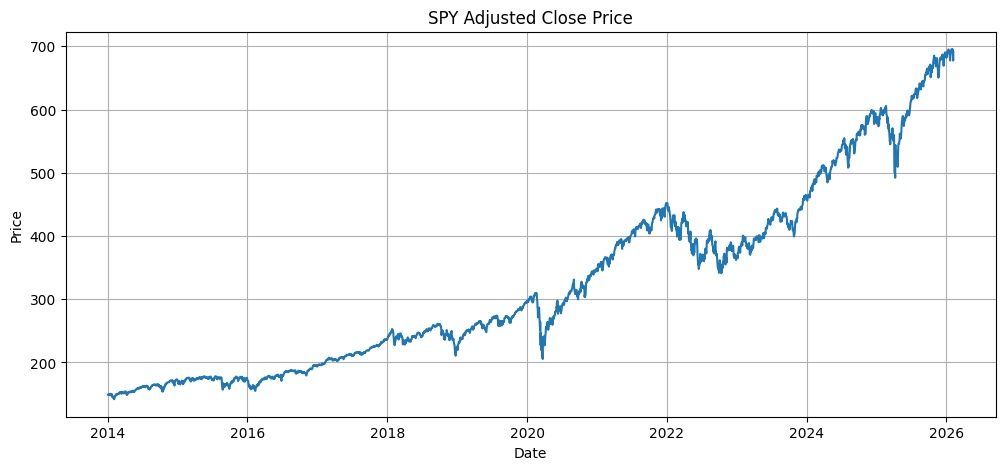

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["Adj Close"])
plt.title(f"{ticker} Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Compute Returns (Simple + Log Returns)

In [21]:
data["simple_return"] = data["Adj Close"].pct_change()
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))

In [23]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,,
2014-01-02,148.986084,182.919998,184.070007,182.479996,183.979996,119636900,NaN,NaN
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600,-0.000164,-0.000164
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200,-0.002898,-0.002902
2014-01-07,149.442139,183.479996,183.789993,182.949997,183.089996,86144200,0.006142,0.006123
2014-01-08,149.474747,183.520004,183.830002,182.889999,183.449997,96582300,0.000218,0.000218


In [24]:
data.dropna(inplace=True)

In [25]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,,
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600,-0.000164,-0.000164
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200,-0.002898,-0.002902
2014-01-07,149.442139,183.479996,183.789993,182.949997,183.089996,86144200,0.006142,0.006123
2014-01-08,149.474747,183.520004,183.830002,182.889999,183.449997,96582300,0.000218,0.000218
2014-01-09,149.572479,183.639999,184.130005,182.800003,184.110001,90683400,0.000654,0.000654


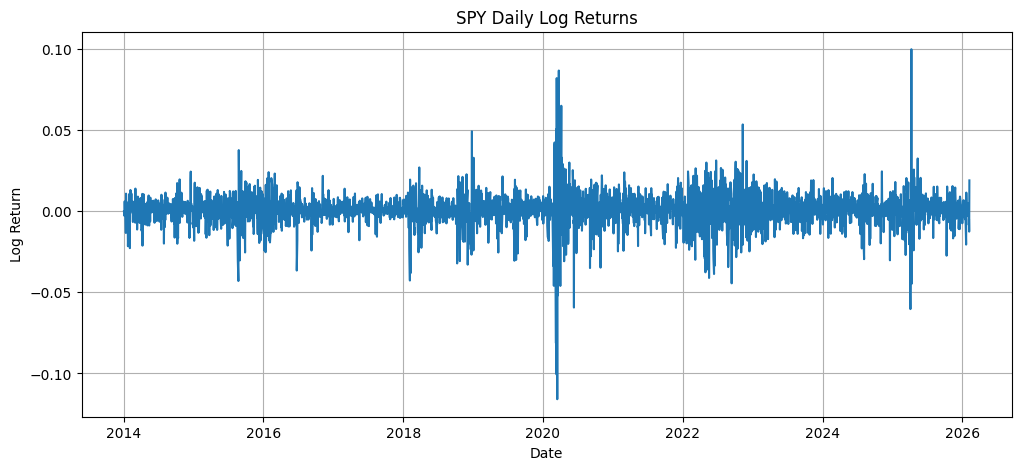

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["log_return"])
plt.title(f"{ticker} Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()